#load dataset

In [ ]:
import pandas as pd

In [ ]:
#read .txt file and convert it to dataframe
file_path='/content/drive/MyDrive/booksummaries.txt'
fields=['ID', 'Tag', 'Title', 'Author', 'Year', 'Genre', 'Description']
data_frame = pd.read_csv(file_path, sep='\t', header=None, names=fields)
data_frame.head()

,ID,Tag,Title,Author,Year,Genre,Description
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...


#missing data

In [ ]:
data_frame.isnull().sum()

ID                0
Tag               0
Title             0
Author         2382
Year           5610
Genre          3718
Description       0
dtype: int64

we need only Description  and title for summarization task ,so drop all null colume

In [ ]:
#cleaning data frame from missing value:
data_frame= data_frame.dropna(axis=1)

#analyzing number of words and sentences

characters level

In [ ]:
data_frame['len_of_Description']=data_frame['Description'].apply(len)

In [ ]:
print('min number of characters of Description',data_frame['len_of_Description'].min())
print('max number of characters of Description',data_frame['len_of_Description'].max())
print('mean number of characters of Description',data_frame['len_of_Description'].mean())
print('std number of characters of Description',data_frame['len_of_Description'].std())

min number of characters of Description 11
max number of characters of Description 58019
mean number of characters of Description 2511.1089437767982
std number of characters of Description 2903.074330081492


<Axes: >

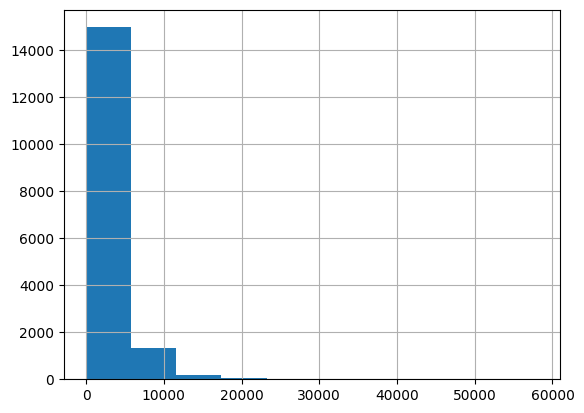

In [ ]:
data_frame['len_of_Description'].hist()

<Axes: >

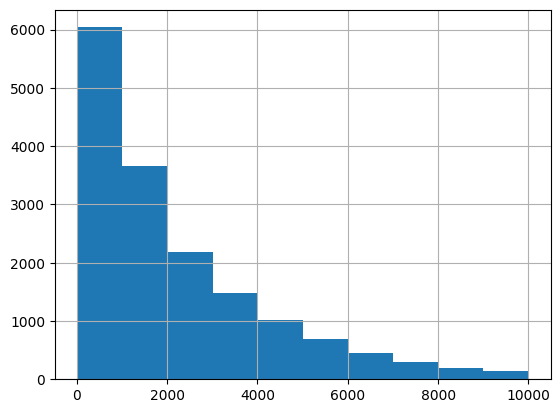

In [ ]:
data_frame[data_frame['len_of_Description']<10000]['len_of_Description'].hist()

<Axes: >

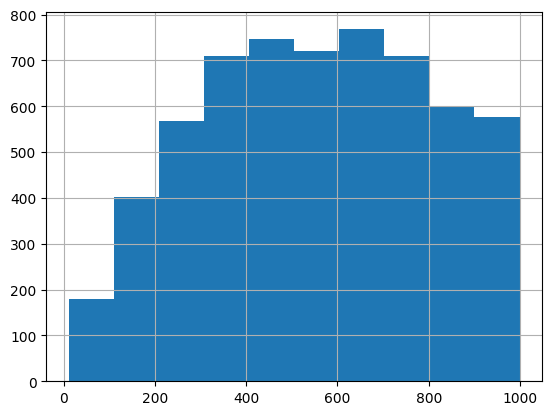

In [ ]:
data_frame[data_frame['len_of_Description']<1000]['len_of_Description'].hist()

In [ ]:
for i,Description  in enumerate(data_frame[data_frame['len_of_Description']<100]['Description']):
  print(i,': \n',Description)

In [ ]:
for i,Description  in enumerate(data_frame[(data_frame['len_of_Description'] > 100) & (data_frame['len_of_Description'] < 200)]['Description']):
  print(i,': \n',Description)

word level

In [ ]:
import nltk
nltk.download('punkt')
import numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def word_tokenizer(data):
  words = word_tokenize(data)
  return words

In [ ]:
data_frame['word_of_Description']=data_frame['Description'].apply(word_tokenizer)

In [ ]:
data_frame['word_numbers_of_Description']=data_frame['word_of_Description'].apply(len)

In [ ]:
print('min number of characters of Description',data_frame['word_numbers_of_Description'].min())
print('max number of characters of Description',data_frame['word_numbers_of_Description'].max())
print('mean number of characters of Description',data_frame['word_numbers_of_Description'].mean())
print('std number of characters of Description',data_frame['word_numbers_of_Description'].std())

min number of characters of Description 1
max number of characters of Description 11810
mean number of characters of Description 491.4608973971858
std number of characters of Description 573.9554854596562


<Axes: >

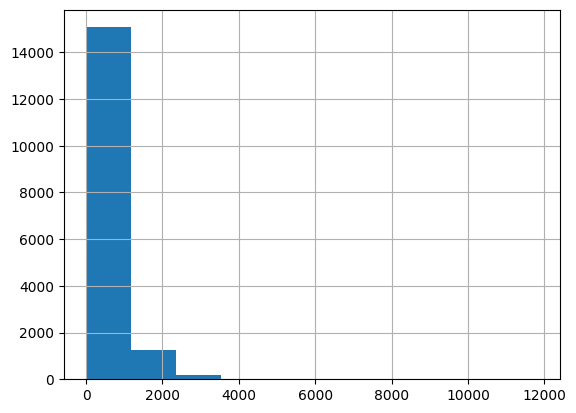

In [ ]:
data_frame['word_numbers_of_Description'].hist()

<Axes: >

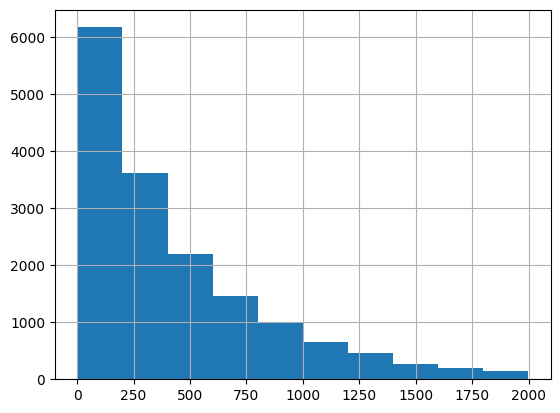

In [ ]:
data_frame[data_frame['word_numbers_of_Description']<2000]['word_numbers_of_Description'].hist()

<Axes: >

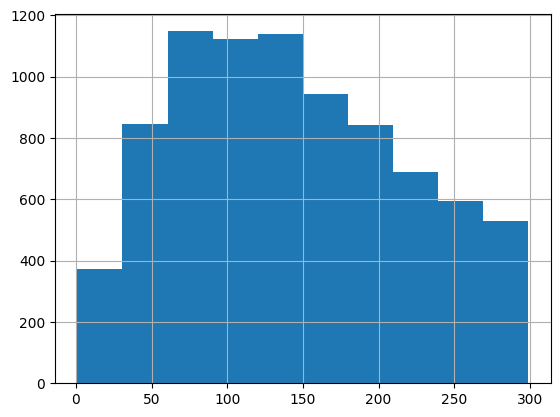

In [ ]:
data_frame[data_frame['word_numbers_of_Description']<300]['word_numbers_of_Description'].hist()

In [ ]:
for i,Description  in enumerate(data_frame[data_frame['word_numbers_of_Description']<30]['Description']):
  print(i,': \n',Description)

sentence level

In [ ]:
def sentence_tokenizer(data):
  sentences = sent_tokenize(data)
  return sentences

In [ ]:
data_frame['sentences_of_Description']=data_frame['Description'].apply(sentence_tokenizer)

In [ ]:
data_frame['sentences_number_of_Description']=data_frame['sentences_of_Description'].apply(len)

In [ ]:
print('min number of characters of Description',data_frame['sentences_number_of_Description'].min())
print('max number of characters of Description',data_frame['sentences_number_of_Description'].max())
print('mean number of characters of Description',data_frame['sentences_number_of_Description'].mean())
print('std number of characters of Description',data_frame['sentences_number_of_Description'].std())

min number of characters of Description 1
max number of characters of Description 511
mean number of characters of Description 19.95633794311251
std number of characters of Description 24.697382650144473


<Axes: >

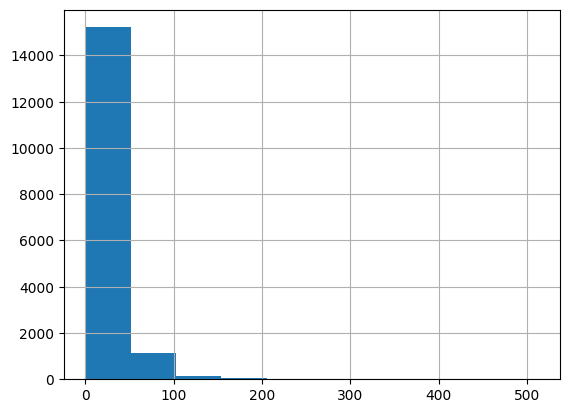

In [ ]:
data_frame['sentences_number_of_Description'].hist()

<Axes: >

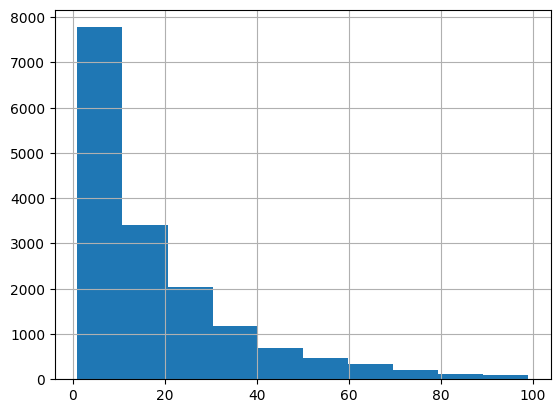

In [ ]:
data_frame[data_frame['sentences_number_of_Description']<100]['sentences_number_of_Description'].hist()

<Axes: >

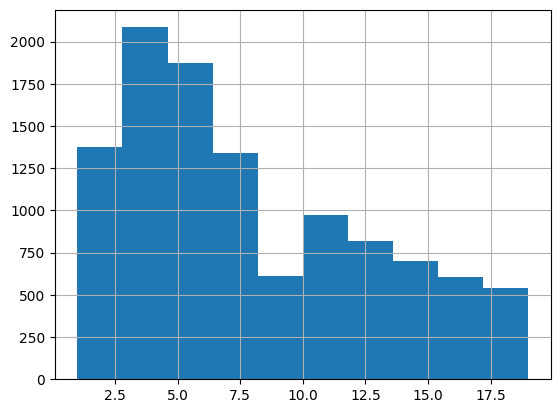

In [ ]:
data_frame[data_frame['sentences_number_of_Description']<20]['sentences_number_of_Description'].hist()

In [ ]:
for i,Description  in enumerate(data_frame[data_frame['sentences_number_of_Description']<2]['Description']):
  print(i,': \n',Description)

**conclusion:**
according to the data of numbers of characters,words and sentences in each description ,I found some description is missed and vague and some of them is very short and consiste of one or twe sentences and I ignore them for summarizing,and the best param for removing outlier data is number of characters in each description and I find the threshold is about 250

In [ ]:
data_frame=data_frame[data_frame['len_of_Description']>250]

#clean& prepare data for EDA

expand contractions('s---> is)

In [ ]:
import re

In [ ]:
# dictionary of English contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not",
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

In [ ]:
data_frame['clean_Description']=data_frame['Description'].apply(lambda x:expand_contractions(x))

lowe caseing description

In [ ]:
data_frame['clean_Description']=data_frame['clean_Description'].apply(lambda x: x.lower())

removeing digits and words containing digits

In [ ]:
data_frame['clean_Description']=data_frame['clean_Description'].apply(lambda x: re.sub('\w*\d\w*','', x))

removeing punctuations

In [ ]:
import string

In [ ]:
data_frame['clean_Description']=data_frame['clean_Description'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

removeing stopwords & lemmatization of words

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [ ]:
# Lemmatization with stopwords removal
data_frame['lemmatized_clean_Description']=data_frame['clean_Description'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))